In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)
conn = engine.connect()

# Exploratory Climate Analysis

In [44]:
# Design a query to retrieve the last 12 months of precipitation data
#all_data = pd.read_sql("SELECT * FROM Measurement", conn)

# Calculate the date 1 year ago from the last data point in the database
all_data.tail()
#last date is 23-08-2017, therefore one year before is 22-08-2016

# Perform a query to retrieve the data and precipitation scores
all_data = pd.read_sql("SELECT date, prcp FROM Measurement WHERE date >= '2016-08-22'", conn)

# Save the query results as a Pandas DataFrame and set the index to the date column
all_data.set_index("date")



# Sort the dataframe by date
all_data.sort_values("date", ascending=False)

,date,prcp
2236,2017-08-23,0.45
1533,2017-08-23,0.08
1011,2017-08-23,0.00
361,2017-08-23,0.00
1532,2017-08-22,0.00
...,...,...
1196,2016-08-22,0.40
1887,2016-08-22,1.20
362,2016-08-22,0.94
1534,2016-08-22,2.32


[]

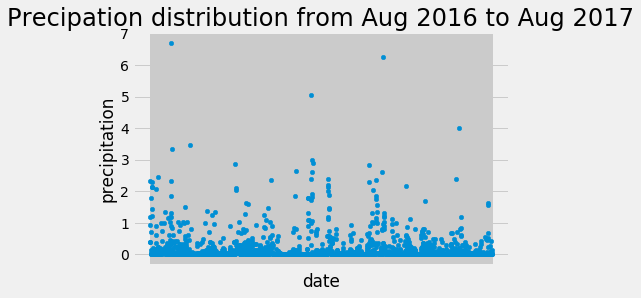

In [24]:
## Use Pandas Plotting with Matplotlib to plot the data
xlabels = ('')
rainplot = all_data.plot.scatter(x='date', y='prcp')
rainplot.set_title("Precipation distribution from Aug 2016 to Aug 2017", fontsize='xx-large')
rainplot.set_ylabel("precipitation")
rainplot.set_xticklabels(xlabels)

[]

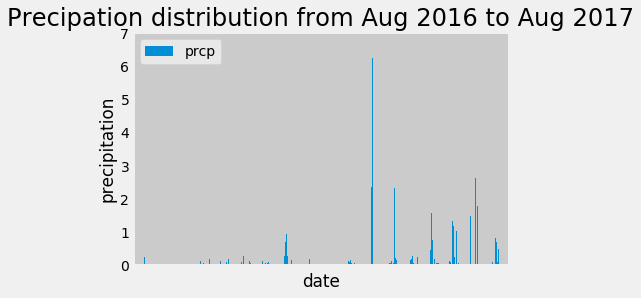

In [25]:
#plot the results
xlabels = ('')
rainplot1 = all_data.plot.bar(x='date', y='prcp')
rainplot1.set_title("Precipation distribution from Aug 2016 to Aug 2017", fontsize='xx-large')
rainplot1.set_ylabel("precipitation")
rainplot1.set_xticklabels(xlabels)

In [26]:
# Use Pandas to calcualte the summary statistics for the precipitation data
all_data.describe()

,prcp
count,2026.000000
mean,0.179437
std,0.463989
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [31]:
# Design a query to show how many stations are available in this dataset?
all_data2 = pd.read_sql("SELECT * FROM Measurement", conn)
all_data2

all_data3 = all_data2.groupby("station")
all_data3.count()

,id,date,prcp,tobs
station,,,,
USC00511918,1979,1979,1932,1979
USC00513117,2709,2709,2696,2709
USC00514830,2202,2202,1937,2202
USC00516128,2612,2612,2484,2612
USC00517948,1372,1372,683,1372
USC00518838,511,511,342,511
USC00519281,2772,2772,2772,2772
USC00519397,2724,2724,2685,2724
USC00519523,2669,2669,2572,2669


In [34]:
all_data = pd.read_sql("SELECT date, prcp, station FROM Measurement WHERE date >= '2016-08-22'", conn)
all_data4 = all_data.groupby("station")
all_data4.count()

,date,prcp
station,,
USC00513117,344,344
USC00514830,306,265
USC00516128,350,329
USC00517948,184,60
USC00519281,353,353
USC00519397,362,360
USC00519523,338,315


In [40]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
all_data5 = all_data.groupby("station")['date'].count().sort_values(ascending=False)
all_data5

station
USC00519397    362
USC00519281    353
USC00516128    350
USC00513117    344
USC00519523    338
USC00514830    306
USC00517948    184
Name: date, dtype: int64

In [49]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
# most active station is USC00519397
station1 = pd.read_sql("SELECT station, tobs FROM Measurement WHERE station = 'USC00519397'", conn)
station1

,station,tobs
0,USC00519397,65.0
1,USC00519397,63.0
2,USC00519397,74.0
3,USC00519397,76.0
4,USC00519397,73.0
...,...,...
2719,USC00519397,79.0
2720,USC00519397,81.0
2721,USC00519397,81.0
2722,USC00519397,82.0


In [51]:
#calculate the lowest temperature recorded
station1.sort_values("tobs", ascending=True)
#lowest temperature is 56

,station,tobs
1763,USC00519397,56.0
1051,USC00519397,58.0
1809,USC00519397,58.0
1423,USC00519397,58.0
1767,USC00519397,58.0
...,...,...
1158,USC00519397,84.0
1668,USC00519397,85.0
566,USC00519397,85.0
212,USC00519397,87.0


In [53]:
#calculate the highest temperature recorded
station1.sort_values("tobs", ascending=False)
#lowest temperature is 87

,station,tobs
2635,USC00519397,87.0
212,USC00519397,87.0
1668,USC00519397,85.0
566,USC00519397,85.0
1158,USC00519397,84.0
...,...,...
1768,USC00519397,58.0
1423,USC00519397,58.0
1809,USC00519397,58.0
338,USC00519397,58.0


In [54]:
#average temperature of the most active station?
station1.describe()
#average is 74.5

,tobs
count,2724.000000
mean,74.553231
std,4.629627
min,56.000000
25%,72.000000
50%,76.000000
75%,78.000000
max,87.000000


In [57]:
# Choose the station with the highest number of temperature observations.
station2 = pd.read_sql("SELECT station, tobs FROM Measurement", conn)
station2
station_group = station2.groupby("station")['tobs'].count().sort_values(ascending=False)
station_group
#USC00519281

station
USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: tobs, dtype: int64

In [60]:
# Query the last 12 months of temperature observation data for this station 
station3 = pd.read_sql("SELECT date, station, tobs FROM Measurement WHERE station = 'USC00519281'", conn)
station3
#last date is 18 August 2017, therefore 12 months before is 18 August 2016


,date,station,tobs
0,2010-01-01,USC00519281,70.0
1,2010-01-02,USC00519281,62.0
2,2010-01-03,USC00519281,74.0
3,2010-01-04,USC00519281,75.0
4,2010-01-05,USC00519281,74.0
...,...,...,...
2767,2017-08-14,USC00519281,77.0
2768,2017-08-15,USC00519281,77.0
2769,2017-08-16,USC00519281,76.0
2770,2017-08-17,USC00519281,76.0


In [67]:
last_station = pd.read_sql("SELECT date, tobs FROM Measurement WHERE date >= '2016-08-18'AND station ='USC00519281'", conn)
last_station

# Save the query results as a Pandas DataFrame and set the index to the date column
last_station.set_index("date")


# Sort the dataframe by date
last_station.sort_values("date", ascending=True).set_index("date")

,tobs
date,
2016-08-18,80.0
2016-08-19,79.0
2016-08-20,81.0
2016-08-21,79.0
2016-08-22,78.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


[]

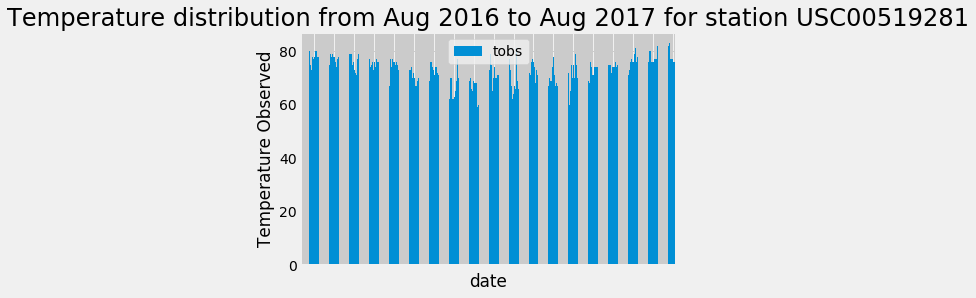

In [68]:
#and plot the results as a histogram
xlabels = ('')
templot = last_station.plot.bar(x='date', y='tobs')
templot.set_title("Temperature distribution from Aug 2016 to Aug 2017 for station USC00519281", fontsize='xx-large')
templot.set_ylabel("Temperature Observed")
templot.set_xticklabels(xlabels)

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
